# Cleaning the oil trends data 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the csv file and load the fist 5 rows

In [2]:
df = pd.read_csv('/Users/phoenix/Projects/alberta-economic-dashboard/data/raw/oil_prices.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-08 00:00:00-04:00,39.480000,39.590000,36.130001,36.759998,720975,0.0,0.0
1,2020-09-09 00:00:00-04:00,36.790001,38.450001,36.160000,38.049999,455356,0.0,0.0
2,2020-09-10 00:00:00-04:00,37.799999,38.180000,36.930000,37.299999,367555,0.0,0.0
3,2020-09-11 00:00:00-04:00,37.009998,37.820000,36.669998,37.330002,363787,0.0,0.0
4,2020-09-14 00:00:00-04:00,37.320000,37.680000,36.820000,37.259998,347563,0.0,0.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1257 non-null   object 
 1   Open          1257 non-null   float64
 2   High          1257 non-null   float64
 3   Low           1257 non-null   float64
 4   Close         1257 non-null   float64
 5   Volume        1257 non-null   int64  
 6   Dividends     1257 non-null   float64
 7   Stock Splits  1257 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.7+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.0,1257.0
mean,74.948862,76.236730,73.576627,74.924320,330511.502784,0.0,0.0
std,15.083747,15.497876,14.587589,15.016218,122501.919239,0.0,0.0
min,35.240002,36.599998,33.639999,35.790001,0.000000,0.0,0.0
25%,67.959999,68.959999,66.610001,67.699997,270223.000000,0.0,0.0
50%,74.209999,75.570000,72.980003,74.080002,328153.000000,0.0,0.0
75%,81.860001,83.080002,80.809998,81.910004,393953.000000,0.0,0.0
max,124.660004,130.500000,120.790001,123.699997,872244.000000,0.0,0.0


In [4]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date ascending
df = df.sort_values('Date')

# Check for missing values
df.isnull().sum()


/var/folders/gd/2q_k8vh54858ylt51bw8mmnr0000gn/T/ipykernel_9817/3645508194.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

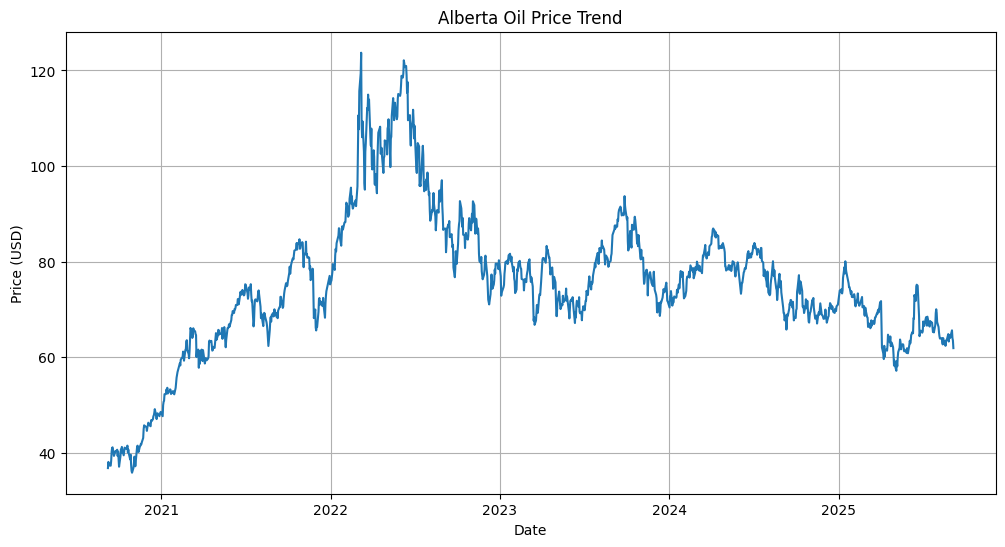

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])  # 'Close' = column with price, adjust if needed
plt.title("Alberta Oil Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


In [7]:
# Save cleaned data
df.to_csv('/Users/phoenix/Projects/alberta-economic-dashboard/data/processed/oil_prices_cleaned.csv', index=False)
